### Bulk LRP Plot Making

In [1]:
%matplotlib inline
import numpy as np
import xarray as xr

import pickle

#plotting related imports
import matplotlib.pyplot as plt
from matplotlib import rcParams #For changing text properties
from cartopy import crs as ccrs #Useful for plotting maps
import cartopy.util #Requires separate import
from cartopy.util import add_cyclic_point
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.path as mpath
import matplotlib.colors as mcolors

In [2]:
#import statements for the clustering-related portions
from sklearn.cluster import KMeans as km

In [3]:
##true values
infile = open("./LRP_stuff/U_neg90_LRP.p", 'rb')
neg90_LRP = pickle.load(infile)
infile.close()

infile = open("./LRP_stuff/U_pos90_LRP.p",'rb')
pos90_LRP = pickle.load(infile)
infile.close()

##false values
infile = open("./LRP_stuff/U_Fneg90_LRP.p",'rb')
Fneg90_LRP = pickle.load(infile)
infile.close()

infile = open("./LRP_stuff/U_Fpos90_LRP.p",'rb')
Fpos90_LRP = pickle.load(infile)
infile.close()

##for composites
infile = open("./LRP_stuff/U_comp_pos.p",'rb')
comp_pos = pickle.load(infile)
infile.close()

infile = open("./LRP_stuff/U_compFpos.p",'rb')
compFpos = pickle.load(infile)
infile.close()

infile = open("./LRP_stuff/U_comp_neg.p",'rb')
comp_neg = pickle.load(infile)
infile.close()

infile = open("./LRP_stuff/U_compFneg.p",'rb')
compFneg = pickle.load(infile)
infile.close()

### Start with LRP code.

Designate lat/lon/lev but the plots are different depending on the feature. 

In [4]:
lat = np.arange(90, 18, -2)
print("Len latitudes: ", len(lat))
lon = np.arange(0, 360, 2)
print("Len longitudes: ", len(lon))


lev = np.array([1., 2., 3., 5., 7., 10., 20., 30., 50., 70., 100., 125., 150., 175., 200., 225., 250., 300., 350., 400., 
                450., 500., 550., 600., 650., 700., 750., 775., 800., 825., 850., 875., 900., 925., 950., 975., 1000.])
print("Len levels: ", len(lev))

Len latitudes:  36
Len longitudes:  180
Len levels:  37


In [5]:
#change based on feature
x1 = lat

x2 = "Latitude ($^o$N)"

Text(0.5, 1.0, 'Frequency LRP of U-Wind associated with 10% Most Confident & Correct - Temp Anomaly')

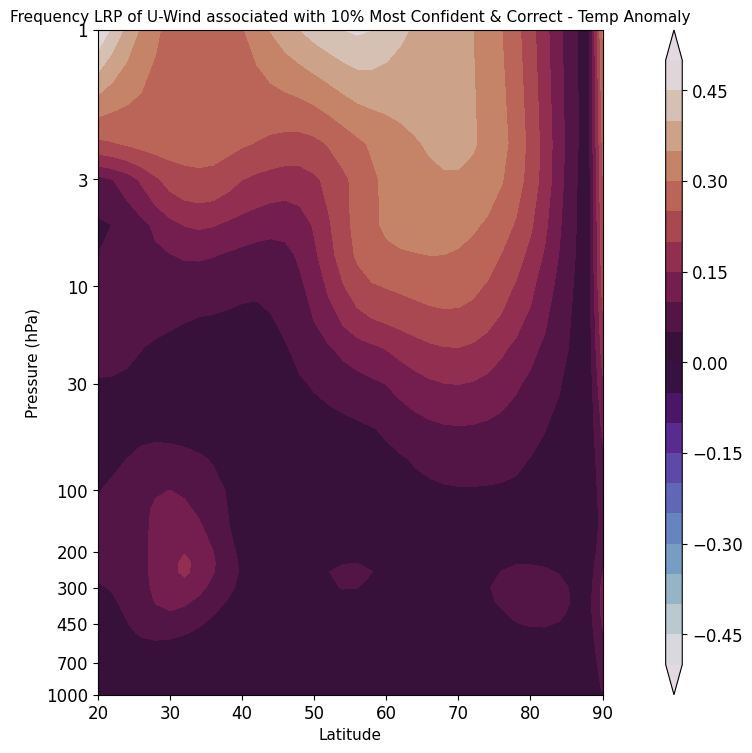

In [6]:
# plot the Correct Negative
color = 'twilight' 

fs=14

fig, ax = plt.subplots(figsize=(7.5, 7.5))
colorbarMin = -0.5
colorbarMax = 0.5
colorspace = 0.05

clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)

h = ax.contourf(x1, lev, np.nanmean(neg90_LRP, axis = 0), clevel, cmap=color, extend="both")
cbar = plt.colorbar(h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40)
cbar.ax.tick_params(labelsize=fs-2)
        
ax.tick_params(labelsize=fs-2)
ax.invert_yaxis()
ax.set_yscale('symlog')
ax.set_ylabel('Pressure (hPa)', fontsize=fs-3)
ax.set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
ax.get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

ax.set_xlim(20, 90)
ax.set_xlabel('Latitude', fontsize=fs-3)

#axes[i].set_xlim(0, 360)
#axes[i].set_xlabel('Longitude', fontsize=fs-3)

plt.tight_layout()
#Set a title for your map:
title = 'Frequency LRP of U-Wind associated with 10% Most Confident & Correct - Temp Anomaly'
plt.title(title,fontsize=11)
#plt.savefig("1204_Neg_LRP.png", bbox_inches='tight', dpi = 150)

Text(0.5, 1.0, 'Frequency LRP of U-Wind associated with 10% Most Confident & Correct + Temp Anomaly')

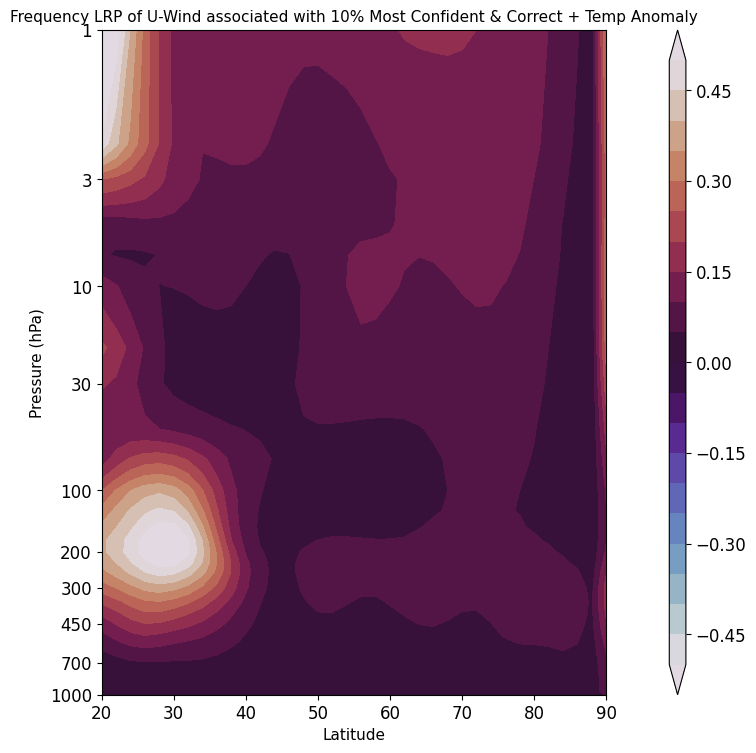

In [7]:
# plot the Correct Po
color = 'twilight' 

fs=14

fig, ax = plt.subplots(figsize=(7.5, 7.5))
colorbarMin = -0.5
colorbarMax = 0.5
colorspace = 0.05

clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)

h = ax.contourf(x1, lev, np.nanmean(pos90_LRP, axis = 0), clevel, cmap=color, extend="both")
cbar = plt.colorbar(h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40)
cbar.ax.tick_params(labelsize=fs-2)
        
ax.tick_params(labelsize=fs-2)
ax.invert_yaxis()
ax.set_yscale('symlog')
ax.set_ylabel('Pressure (hPa)', fontsize=fs-3)
ax.set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
ax.get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

ax.set_xlim(20, 90)
ax.set_xlabel('Latitude', fontsize=fs-3)

#axes[i].set_xlim(0, 360)
#axes[i].set_xlabel('Longitude', fontsize=fs-3)

plt.tight_layout()
#Set a title for your map:
title = 'Frequency LRP of U-Wind associated with 10% Most Confident & Correct + Temp Anomaly'
plt.title(title,fontsize=11)
#plt.savefig("1204_Neg_LRP.png", bbox_inches='tight', dpi = 150)

Text(0.5, 1.0, 'Frequency LRP of U-Wind associated with 10% Most Confident & False + Temp Anomaly')

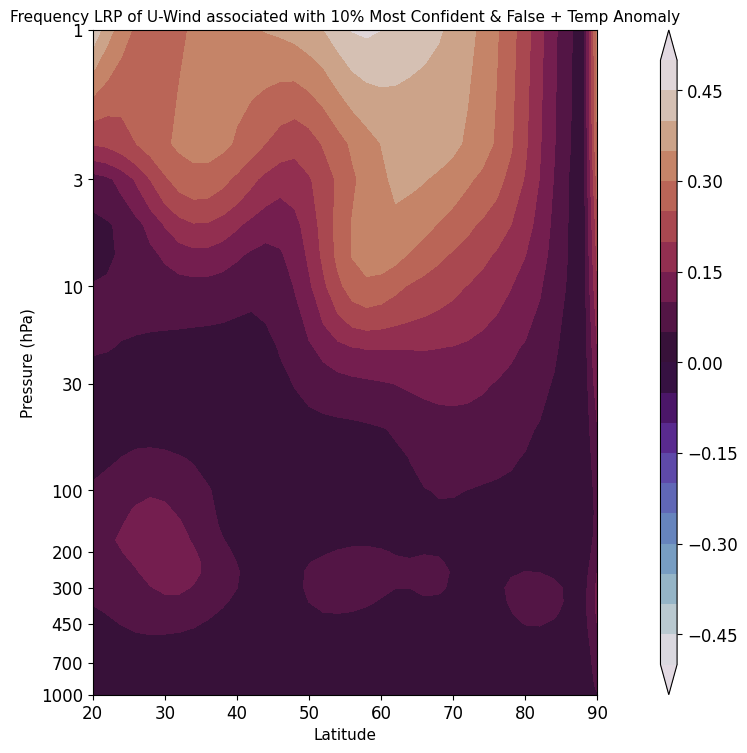

In [8]:
# plot the False Positive 
color = 'twilight' 

fs=14

fig, ax = plt.subplots(figsize=(7.5, 7.5))
colorbarMin = -0.5
colorbarMax = 0.5
colorspace = 0.05

clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)

h = ax.contourf(x1, lev, np.nanmean(Fpos90_LRP, axis = 0), clevel, cmap=color, extend="both")
cbar = plt.colorbar(h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40)
cbar.ax.tick_params(labelsize=fs-2)
        
ax.tick_params(labelsize=fs-2)
ax.invert_yaxis()
ax.set_yscale('symlog')
ax.set_ylabel('Pressure (hPa)', fontsize=fs-3)
ax.set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
ax.get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

ax.set_xlim(20, 90)
ax.set_xlabel('Latitude', fontsize=fs-3)

#axes[i].set_xlim(0, 360)
#axes[i].set_xlabel('Longitude', fontsize=fs-3)

plt.tight_layout()
#Set a title for your map:
title = 'Frequency LRP of U-Wind associated with 10% Most Confident & False + Temp Anomaly'
plt.title(title,fontsize=11)
#plt.savefig("1204_Neg_LRP.png", bbox_inches='tight', dpi = 150)

Text(0.5, 1.0, 'Frequency LRP of U-Wind associated with 10% Most Confident & False - Temp Anomaly')

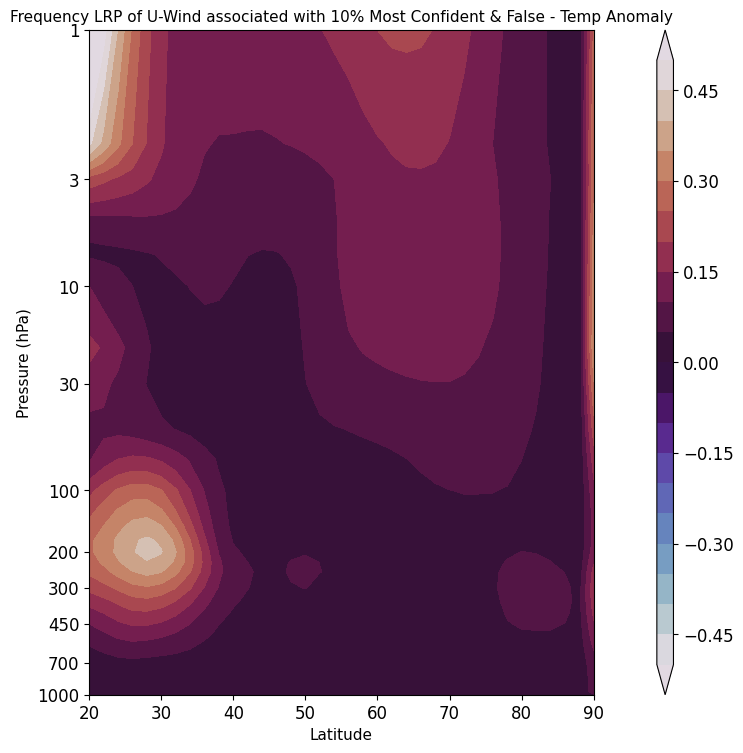

In [9]:
# plot the False Negative
color = 'twilight' 

fs=14

fig, ax = plt.subplots(figsize=(7.5, 7.5))
colorbarMin = -0.5
colorbarMax = 0.5
colorspace = 0.05

clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)

h = ax.contourf(x1, lev, np.nanmean(Fneg90_LRP, axis = 0), clevel, cmap=color, extend="both")
cbar = plt.colorbar(h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40)
cbar.ax.tick_params(labelsize=fs-2)
        
ax.tick_params(labelsize=fs-2)
ax.invert_yaxis()
ax.set_yscale('symlog')
ax.set_ylabel('Pressure (hPa)', fontsize=fs-3)
ax.set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
ax.get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

ax.set_xlim(20, 90)
ax.set_xlabel('Latitude', fontsize=fs-3)

#axes[i].set_xlim(0, 360)
#axes[i].set_xlabel('Longitude', fontsize=fs-3)

plt.tight_layout()
#Set a title for your map:
title = 'Frequency LRP of U-Wind associated with 10% Most Confident & False - Temp Anomaly'
plt.title(title,fontsize=11)
#plt.savefig("1204_Neg_LRP.png", bbox_inches='tight', dpi = 150)

### Now make composite gph anomaly plots. 

In [10]:
##reshape comp arrays
cpos = comp_pos.reshape(100,37,36)
cneg = comp_neg.reshape(100,37,36)
cFpos = compFpos.reshape(100,37,36)
cFneg = compFneg.reshape(100,37,36)

cFneg.shape

(100, 37, 36)

In [11]:
pos_neg = cneg - cpos
pos_neg.shape

(100, 37, 36)

Text(0.5, 1.0, 'Composite U-Wind associated with 10% Most Confident & Correct - Temp Anomaly')

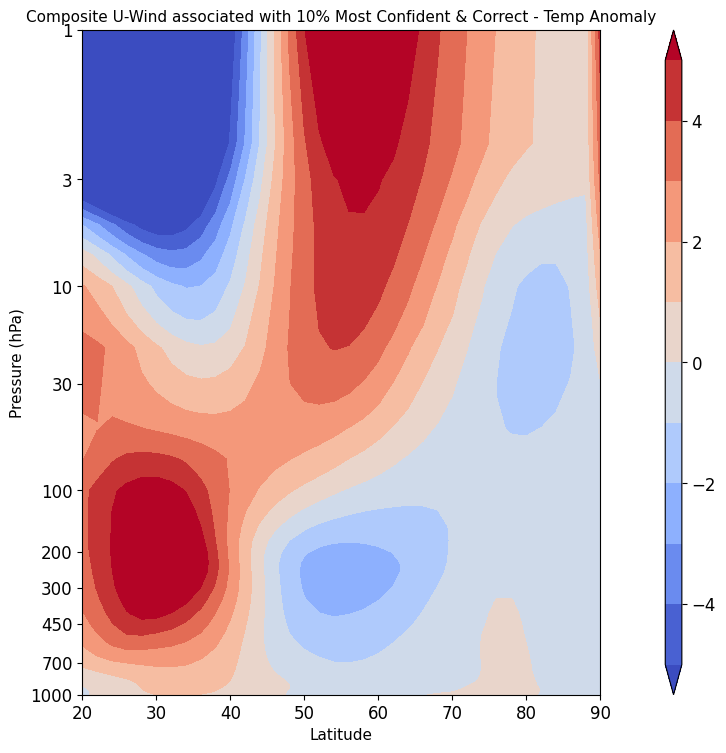

In [12]:
# plot the Correct Positive Composite
color = 'coolwarm' 
fs=14

fig, ax = plt.subplots(figsize=(7.5, 7.5))
colorbarMin = -5
colorbarMax = 5
colorspace = 1

clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)

h = ax.contourf(x1, lev, np.nanmean(cneg, axis = 0), clevel, cmap=color, extend="both")
cbar = plt.colorbar(h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40)
cbar.ax.tick_params(labelsize=fs-2)
        
ax.tick_params(labelsize=fs-2)
ax.invert_yaxis()
ax.set_yscale('symlog')
ax.set_ylabel('Pressure (hPa)', fontsize=fs-3)
ax.set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
ax.get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

ax.set_xlim(20, 90)
ax.set_xlabel('Latitude', fontsize=fs-3)

#axes[i].set_xlim(0, 360)
#axes[i].set_xlabel('Longitude', fontsize=fs-3)

plt.tight_layout()
#Set a title for your map:
title = 'Composite U-Wind associated with 10% Most Confident & Correct - Temp Anomaly'
plt.title(title,fontsize=11)

Text(0.5, 1.0, 'Composite U-Wind associated with 10% Most Confident & Correct + Temp Anomaly')

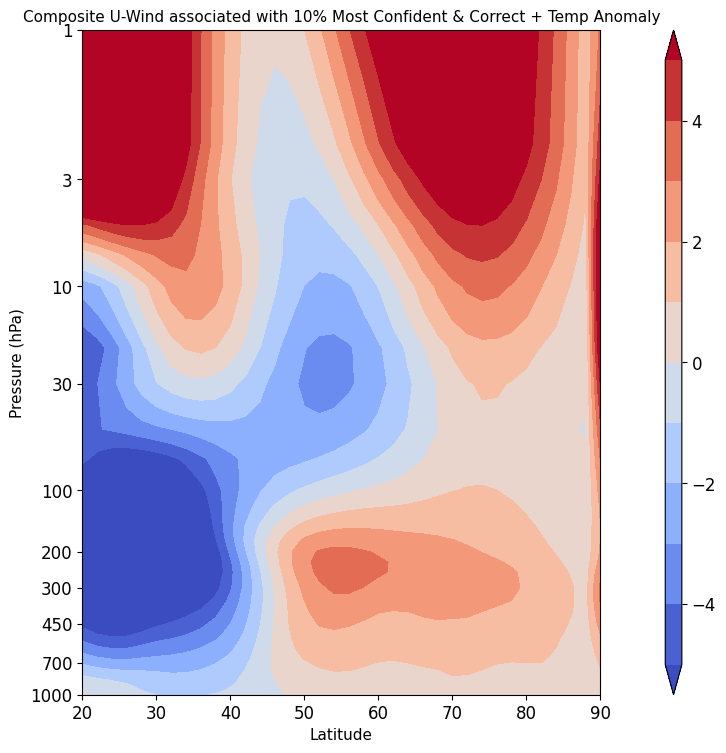

In [13]:
# plot the Correct Positive Composite
color = 'coolwarm' 
fs=14

fig, ax = plt.subplots(figsize=(7.5, 7.5))
colorbarMin = -5
colorbarMax = 5
colorspace = 1

clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)

h = ax.contourf(x1, lev, np.nanmean(cpos, axis = 0), clevel, cmap=color, extend="both")
cbar = plt.colorbar(h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40)
cbar.ax.tick_params(labelsize=fs-2)
        
ax.tick_params(labelsize=fs-2)
ax.invert_yaxis()
ax.set_yscale('symlog')
ax.set_ylabel('Pressure (hPa)', fontsize=fs-3)
ax.set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
ax.get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

ax.set_xlim(20, 90)
ax.set_xlabel('Latitude', fontsize=fs-3)

#axes[i].set_xlim(0, 360)
#axes[i].set_xlabel('Longitude', fontsize=fs-3)

plt.tight_layout()
#Set a title for your map:
title = 'Composite U-Wind associated with 10% Most Confident & Correct + Temp Anomaly'
plt.title(title,fontsize=11)

Text(0.5, 1.0, 'Composite U-Wind associated with 10% Most Confident & False - Temp Anomaly')

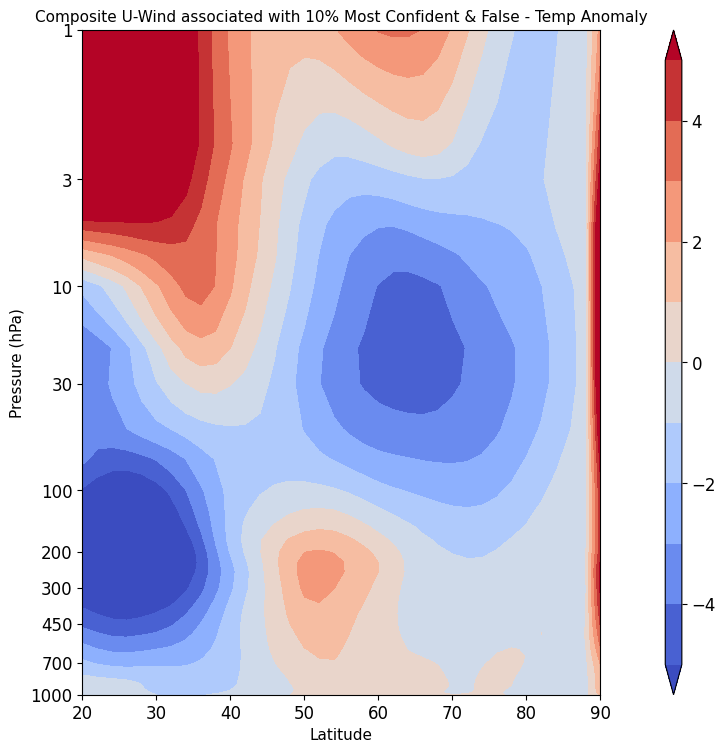

In [14]:
# plot the False Negative Composite
color = 'coolwarm' 
fs=14

fig, ax = plt.subplots(figsize=(7.5, 7.5))
colorbarMin = -5
colorbarMax = 5
colorspace = 1

clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)

h = ax.contourf(x1, lev, np.nanmean(cFneg, axis = 0), clevel, cmap=color, extend="both")
cbar = plt.colorbar(h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40)
cbar.ax.tick_params(labelsize=fs-2)
        
ax.tick_params(labelsize=fs-2)
ax.invert_yaxis()
ax.set_yscale('symlog')
ax.set_ylabel('Pressure (hPa)', fontsize=fs-3)
ax.set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
ax.get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

ax.set_xlim(20, 90)
ax.set_xlabel('Latitude', fontsize=fs-3)

#axes[i].set_xlim(0, 360)
#axes[i].set_xlabel('Longitude', fontsize=fs-3)

plt.tight_layout()
#Set a title for your map:
title = 'Composite U-Wind associated with 10% Most Confident & False - Temp Anomaly'
plt.title(title,fontsize=11)

Text(0.5, 1.0, 'Composite U-Wind associated with 10% Most Confident & False + Temp Anomaly')

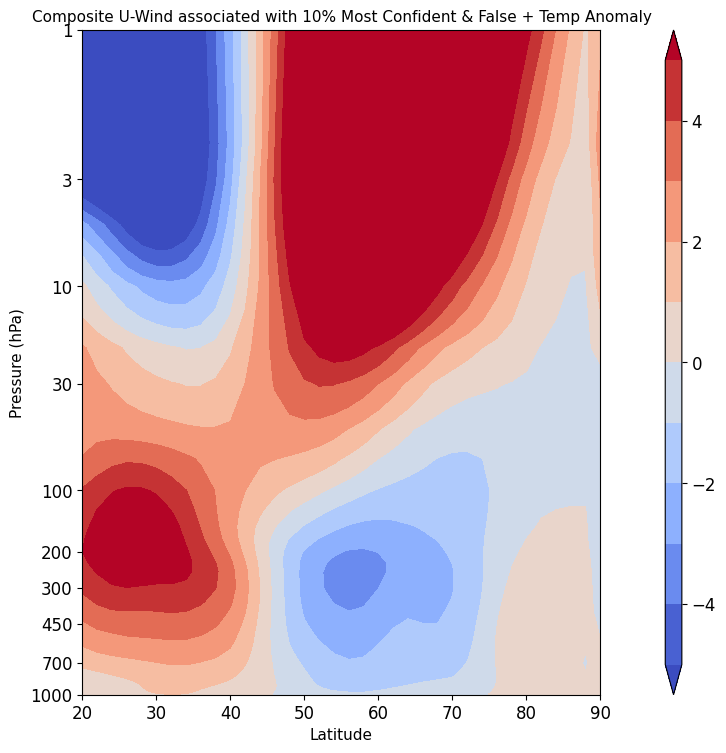

In [15]:
# plot the False Positive Composite
color = 'coolwarm' 
fs=14

fig, ax = plt.subplots(figsize=(7.5, 7.5))
colorbarMin = -5
colorbarMax = 5
colorspace = 1

clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)

h = ax.contourf(x1, lev, np.nanmean(cFpos, axis = 0), clevel, cmap=color, extend="both")
cbar = plt.colorbar(h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40)
cbar.ax.tick_params(labelsize=fs-2)
        
ax.tick_params(labelsize=fs-2)
ax.invert_yaxis()
ax.set_yscale('symlog')
ax.set_ylabel('Pressure (hPa)', fontsize=fs-3)
ax.set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
ax.get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

ax.set_xlim(20, 90)
ax.set_xlabel('Latitude', fontsize=fs-3)

#axes[i].set_xlim(0, 360)
#axes[i].set_xlabel('Longitude', fontsize=fs-3)

plt.tight_layout()
#Set a title for your map:
title = 'Composite U-Wind associated with 10% Most Confident & False + Temp Anomaly'
plt.title(title,fontsize=11)